In [14]:
import matplotlib.pyplot as plt
from numpy import loadtxt
import numpy as np
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')

%matplotlib inline

In [41]:
# 1. Download sunspot dataset and upload the same to dataset directory
#    Load the sunspot dataset as an Array
#!mkdir -p dataset
#!wget -c -b http://www-personal.umich.edu/~mejn/cp/data/Impression.txt -P dataset

import matplotlib.dates as mdates

def convert_date(date_bytes):
    return mdates.strpdate2num('%m/%d/%y')(date_bytes.decode('ascii'))

data = loadtxt("dataset/webTraffic.csv", delimiter=',', skiprows=1, converters={0: convert_date})

# 2. View the data as a table
data_frame = pd.DataFrame(data, columns=['Day', 'Impression'])

#data_frame.head(15)
data_frame.describe()

,Day,Impression
count,721.00000,721.000000
mean,735552.00000,70.052705
std,208.27906,28.972592
min,735192.00000,14.000000
25%,735372.00000,46.000000
50%,735552.00000,69.000000
75%,735732.00000,89.000000
max,735912.00000,171.000000


In [50]:
df = pd.DataFrame(data_frame.Impression)

df['MA_10'] = df.Impression.rolling(10).mean()
df['SD_10'] = df.Impression.rolling(10).std()

df.head(15)

,Impression,MA_10,SD_10
0,32.0,NaN,NaN
1,27.0,NaN,NaN
2,30.0,NaN,NaN
3,25.0,NaN,NaN
4,14.0,NaN,NaN
5,41.0,NaN,NaN
6,32.0,NaN,NaN
7,48.0,NaN,NaN
8,22.0,NaN,NaN
9,26.0,29.7,9.557429


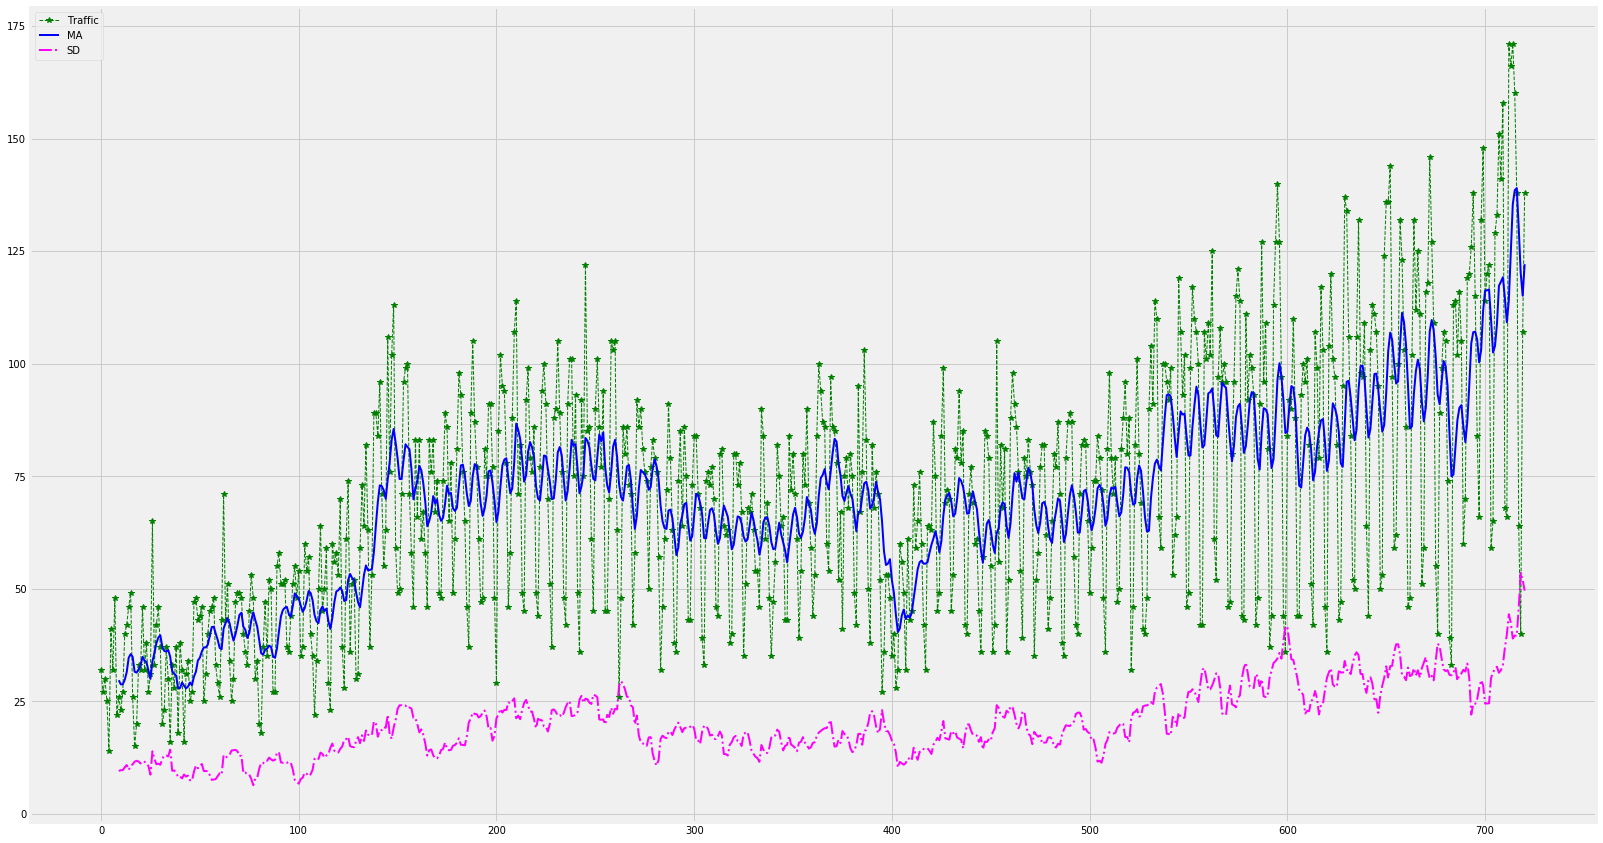

In [51]:
plt.figure(figsize=(25,15))
plt.grid(True)

plt.plot(df['Impression'], marker='*', label='Traffic', color='green', ls='dashed', linewidth=1)

plt.plot(df['MA_10'], label='MA', color='blue', linewidth=2)
plt.plot(df['SD_10'], label='SD', color='magenta', linewidth=2, ls='dashdot')

plt.legend(loc=2)

In [52]:
'''
#3 sigma rule
    https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule
    
# Mean (+/-) SD (standard deviation) * SIGMA
'''

df['LOW_1'] = df.MA_10 - df.SD_10 
df['HIGH_1'] = df.MA_10 + df.SD_10
df
df['LOW_2'] = df.MA_10 - df.SD_10 * 2
df['HIGH_2'] = df.MA_10 + df.SD_10 * 2

#df['LOW_3'] = df.MA_10 - df.SD_10 * 3
#df['HIGH_3'] = df.MA_10 + df.SD_10 * 3

df.head(15)

,Impression,MA_10,SD_10,LOW_1,HIGH_1,LOW_2,HIGH_2
0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
1,27.0,NaN,NaN,NaN,NaN,NaN,NaN
2,30.0,NaN,NaN,NaN,NaN,NaN,NaN
3,25.0,NaN,NaN,NaN,NaN,NaN,NaN
4,14.0,NaN,NaN,NaN,NaN,NaN,NaN
5,41.0,NaN,NaN,NaN,NaN,NaN,NaN
6,32.0,NaN,NaN,NaN,NaN,NaN,NaN
7,48.0,NaN,NaN,NaN,NaN,NaN,NaN
8,22.0,NaN,NaN,NaN,NaN,NaN,NaN
9,26.0,29.7,9.557429,20.142571,39.257429,10.585142,48.814858


In [56]:
#'''
# 1,2 Sigma outliers
df['Anomaly'] = (df.Impression >= df.HIGH_2) | \
                        (df.Impression <= df.LOW_2) | \
                        (df.Impression >= df.HIGH_1) | \
                        (df.Impression <= df.LOW_1)
'''

# 2-SIGMA outliers
df['Anomaly'] = (df.Impression >= df.HIGH_2) | \
                        (df.Impression <= df.LOW_2)    
'''

filt_spot = df.loc[df['Anomaly'] == True]
filt_spot
#filt_spot.describe()

,Impression,MA_10,SD_10,LOW_1,HIGH_1,LOW_2,HIGH_2,Anomaly
14,46.0,34.7,9.809859,24.890141,44.509859,15.080282,54.319718,True
15,49.0,35.5,10.669271,24.830729,46.169271,14.161459,56.838541,True
17,15.0,31.6,11.616081,19.983919,43.216081,8.367838,54.832162,True
26,65.0,33.9,13.924000,19.976000,47.824000,6.052000,61.748000,True
31,20.0,37.1,12.278708,24.821292,49.378708,12.542584,61.657416,True
32,23.0,36.2,13.002564,23.197436,49.202564,10.194872,62.205128,True
35,16.0,34.9,14.286357,20.613643,49.186357,6.327286,63.472714,True
39,18.0,27.9,8.198238,19.701762,36.098238,11.503523,44.296477,True
40,38.0,28.0,8.326664,19.673336,36.326664,11.346672,44.653328,True
42,16.0,28.5,8.771798,19.728202,37.271798,10.956404,46.043596,True


Plotting


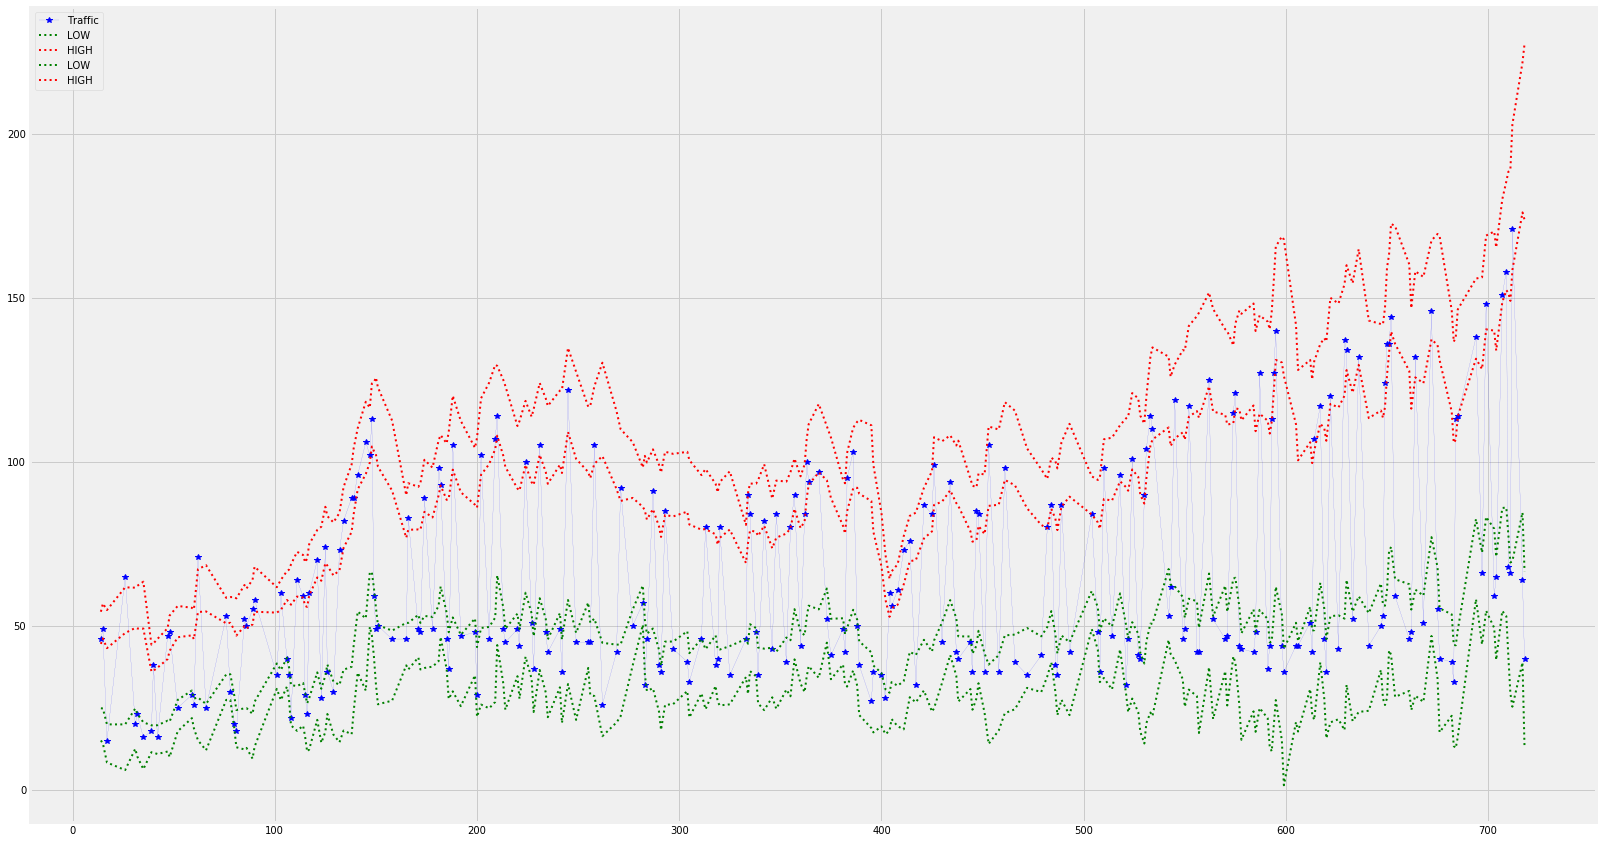

In [59]:
plt.figure(figsize=(25,15))
plt.grid(True)

plt.plot(filt_spot['Impression'], marker='*', label='Traffic', color='blue', ls='solid', linewidth=0.1)

plt.plot(filt_spot['LOW_1'], label='LOW', color='green', linewidth=2, ls='dotted')
plt.plot(filt_spot['HIGH_1'], label='HIGH', color='red', linewidth=2, ls='dotted')

plt.plot(filt_spot['LOW_2'], label='LOW', color='green', linewidth=2, ls='dotted')
plt.plot(filt_spot['HIGH_2'], label='HIGH', color='red', linewidth=2, ls='dotted')

print("Plotting")

plt.legend(loc=2)